In [ ]:
!pip install firthlogist

In [45]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Logit
from firthlogist import FirthLogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Load the SNMP MIB data
data = pd.read_csv("C:/Python/Capstone Project/ANOVA/testfinal.csv")
data = pd.get_dummies(data, columns=['host','Battery_Status','Output_Status'])

# Data Cleaning

In [3]:
#drop columns because not significant to the analysis
#drop columns 'Full_Charge_Voltage','Input_Max_Line_Voltage', 'Output_Line_Voltage',  because of high correlation between IV tends to get multicollinearity
data_new_LgR=data.drop(['name','Last_Replacement_Date','Date_Manufacture','time','Config_Rated_Output_Voltage','Replacement','Full_Charge_Voltage','Input_Max_Line_Voltage', 'Output_Line_Voltage','Base_Config_Num_Device','Input_Min_Line_Voltage'], axis=1)

In [ ]:
data_new_LgR.head()

In [4]:
data_new_LgR.isna().sum().where(lambda x: x>0)

Battery_Voltage             NaN
Capacity                    NaN
Input_Frequency       1075971.0
Input_Line_Voltage          NaN
Output_Frequency            NaN
Output_Load           1075982.0
Remaining_Time              NaN
Temperature                 NaN
Time_On_Battery             NaN
host_10.0.0.53              NaN
host_10.0.0.8               NaN
Battery_Status_2.0          NaN
Output_Status_2             NaN
Output_Status_3             NaN
Output_Status_6             NaN
dtype: float64

In [6]:
# impute the missing values with mean
data_new_LgR['Input_Frequency'] = data_new_LgR['Input_Frequency'].fillna(data_new_LgR['Input_Frequency'].mean())
data_new_LgR['Output_Load'] = data_new_LgR['Output_Load'].fillna(data_new_LgR['Output_Load'].mean())
#data_new_LgR['Input_Min_Line_Voltage'] = data_new_LgR['Input_Min_Line_Voltage'].fillna(data_new_LgR['Input_Min_Line_Voltage'].mean())

In [7]:
# to standardize the data
data_new_LgR['Temperature'] = (data_new_LgR['Temperature'] * 0.10).round(2)

### Data tweak

In [8]:
# Data imputation to create outliers, temperature spike 
# and low battery capacity
data_new_LgR.loc[data_new_LgR['Temperature'] == 22, 'Temperature'] = 60
data_new_LgR.loc[data_new_LgR['Capacity'] == 55, 'Capacity'] = 10

In [9]:
data_new_LgR.describe()

,Battery_Voltage,Capacity,Input_Frequency,Input_Line_Voltage,Output_Frequency,Output_Load,Remaining_Time,Temperature,Time_On_Battery,host_10.0.0.53,host_10.0.0.8,Battery_Status_2.0,Output_Status_2,Output_Status_3,Output_Status_6
count,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06
mean,2.200726e+01,9.667535e+01,4.609313e+02,2.412694e+03,4.984651e+02,5.923451e+00,1.490202e+01,2.816459e+01,2.098949e+00,5.361375e-01,4.638625e-01,1.205806e-02,9.972555e-01,1.003920e-03,1.740557e-03
std,1.484557e-01,3.389042e+00,1.433346e+01,8.562087e+01,1.629388e+01,3.386791e-01,6.928519e+02,4.029362e+00,8.346569e+01,4.986926e-01,4.986926e-01,1.091452e-01,5.231584e-02,3.166881e-02,4.168368e-02
min,2.000000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,9.300000e+01,4.609313e+02,2.397000e+03,4.990000e+02,5.923451e+00,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.200000e+01,9.500000e+01,4.609313e+02,2.415000e+03,4.990000e+02,5.923451e+00,0.000000e+00,2.500000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.200000e+01,1.000000e+02,4.609313e+02,2.433000e+03,4.990000e+02,5.923451e+00,0.000000e+00,3.200000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,2.400000e+01,1.000000e+02,5.000000e+02,2.573000e+03,5.000000e+02,8.000000e+00,1.200000e+05,6.000000e+01,5.135000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
# battery_status data tweaked
data_new_LgR['Battery_Status_2.0'] = data_new_LgR['Battery_Status_2.0'].replace({0:1, 1:0})
# battery_status and capacity tweak data 
data_new_LgR.loc[data_new_LgR['Battery_Status_2.0'] == 0, 'Capacity'] =10

### Rename column

In [11]:
# need to rename columns because 
# variable "host_10.0.0.53" is causing the issue. 
# The dot notation is used to access object properties in Python, 
# raises a syntax error because it's not a valid property name.
data_new_LgR.rename(columns={'Battery_Status_2.0': 'Battery_Status_2'}, inplace=True)
data_new_LgR.rename(columns={'host_10.0.0.53': 'UPS_1'}, inplace=True)
data_new_LgR.rename(columns={'host_10.0.0.8': 'UPS_2'}, inplace=True)

In [12]:
data_new_LgR['Battery_Status_2'].value_counts()

1    1075604
0      13128
Name: Battery_Status_2, dtype: int64

In [13]:
data_new_LgR.head(3)

,Battery_Voltage,Capacity,Input_Frequency,Input_Line_Voltage,Output_Frequency,Output_Load,Remaining_Time,Temperature,Time_On_Battery,UPS_1,UPS_2,Battery_Status_2,Output_Status_2,Output_Status_3,Output_Status_6
0,22,95,460.931275,2378,499,5.923451,0,25.0,0,1,0,1,1,0,0
1,22,100,460.931275,2415,499,5.923451,0,26.0,0,0,1,1,1,0,0
2,22,95,460.931275,2378,499,5.923451,0,25.0,0,1,0,1,1,0,0


# EDA

In [14]:
data_new_LgR_numerical= data_new_LgR.drop(columns=['UPS_1', 'UPS_2',
       'Battery_Status_2', 'Output_Status_2', 'Output_Status_3',
       'Output_Status_6'], axis=1)

C:\Users\Dila\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Battery_Voltage', ylabel='Density'>

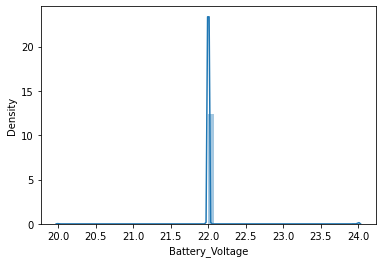

In [18]:
#To visualize the distribution of a single variable
sns.distplot(data_new_LgR['Battery_Voltage'])

<AxesSubplot:xlabel='Battery_Status_2', ylabel='count'>

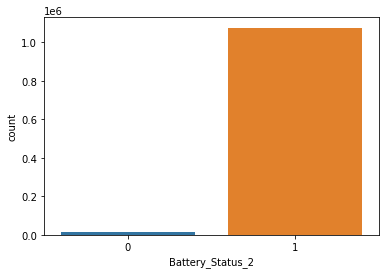

In [19]:
#To visualize the distribution of categorical variable
sns.countplot(x='Battery_Status_2',data=data_new_LgR)

# Logistic Regression

In [30]:
#X = data_new_LgR[['Base_Config_Num_Device' ,' Battery_Voltage' , 'Capacity ', 'Full_Charge_Voltage' , 'Input_Frequency' , 'Input_Line_Voltage','Input_Max_Line_Voltage',' Input_Min_Line_Voltage', 'Output_Frequency' , 'Output_Line_Voltage', 'Output_Load','Remaining_Time + Temperature + Time_On_Battery +  host_10.0.0.53 + host_10.0.0.8 + Output_Status_2 + Output_Status_3 + Output_Status_6 ]]
#X= data_new_LgR.drop(columns=['Battery_Status_2'], axis=1)
X = data_new_LgR[['Output_Load', 'Capacity','Battery_Voltage','Input_Frequency', 'Temperature']]
y = data_new_LgR['Battery_Status_2']


In [31]:
# Notice how tol must be changed to less than default value or convergence won't happen
# Use a high value of C to remove regularization
#(C=100000, tol=.0000001)-inside parameter of LR
model = LogisticRegression()
model.fit(X, y)
model.intercept_, model.coef_

(array([-16.68307276]),
 array([[-2.49755667e-04,  4.56401290e-01, -2.32036891e-02,
          2.83238007e-04, -5.22290029e-02]]))

In [28]:
result = smf.logit(formula= 'Battery_Status_2 ~ Output_Load + Temperature + Battery_Voltage + Input_Frequency', data=data_new_LgR).fit()

Optimization terminated successfully.
         Current function value: 0.044295
         Iterations 10


In [33]:
result2 = smf.logit(formula= 'Battery_Status_2 ~ Output_Load + Capacity + Battery_Voltage + Input_Frequency', data=data_new_LgR).fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\Dila\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Battery_Status_2   No. Observations:              1088732
Model:                          Logit   Df Residuals:                  1088727
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Feb 2023   Pseudo R-squ.:                  0.3212
Time:                        09:28:29   Log-Likelihood:                -48225.
converged:                       True   LL-Null:                       -71048.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          83.1271      0.610    136.256      0.000      81.931      84.323
Output_Load        -0.1519      0.011    -13.379      0.000      -0.174      -0.130
Temperature        -0.1909      0.003    -73.522      0.000      -0.196      -0.186
Battery_Voltage    -3.7838      0.029   -129.495      0.000      -3.841      -3.727
Input_Frequency     0.0251      0.000    119.725      0.000       0.025       0.026
===================================================================================
"""

In [34]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Battery_Status_2   No. Observations:              1088732
Model:                          Logit   Df Residuals:                  1088727
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Feb 2023   Pseudo R-squ.:                   1.000
Time:                        09:36:42   Log-Likelihood:             -0.0015211
converged:                      False   LL-Null:                       -71048.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         126.6748   1.58e+05      0.001      0.999   -3.09e+05    3.09e+05
Output_Load        -0.3785      8.724     -0.043      0.965     -17.478      16.721
Capacity            0.9662   4448.253      0.000      1.000   -8717.449    8719.382
Battery_Voltage    -7.4134   7561.205     -0.001      0.999   -1.48e+04    1.48e+04
Input_Frequency    -0.0107     24.148     -0.000      1.000     -47.340      47.319
===================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

# Bootstrap

In [32]:
data_new_LgR_params = pd.DataFrame(columns=['Intercept',  'Output_Load' + 'Temperature' + 'Battery_Voltage' + 'Input_Frequency' ])
for i in range(100):
    data_new_LgR_sample = data_new_LgR.sample(len(data_new_LgR), replace=True)
    result_sample = smf.logit(formula='Battery_Status_2 ~ Output_Load + Temperature +  Battery_Voltage + Input_Frequency ', data=data_new_LgR_sample).fit(disp=0)
    data_new_LgR_params = data_new_LgR_params.append(result_sample.params, ignore_index=True)

In [35]:
# bootstrap parameters and standard error
data_new_LgR_params.mean(), data_new_LgR_params.std()

(Intercept                                               83.147796
 Output_LoadTemperatureBattery_VoltageInput_Frequency          NaN
 Battery_Voltage                                         -3.784391
 Input_Frequency                                          0.025094
 Output_Load                                             -0.153022
 Temperature                                             -0.190897
 dtype: float64,
 Intercept                                               0.953147
 Output_LoadTemperatureBattery_VoltageInput_Frequency         NaN
 Battery_Voltage                                         0.039324
 Input_Frequency                                         0.000329
 Output_Load                                             0.033868
 Temperature                                             0.001393
 dtype: float64)

In [36]:
# model parameters and standard error
result.params, result.bse

(Intercept          83.127066
 Output_Load        -0.151933
 Temperature        -0.190862
 Battery_Voltage    -3.783816
 Input_Frequency     0.025098
 dtype: float64,
 Intercept          0.610080
 Output_Load        0.011356
 Temperature        0.002596
 Battery_Voltage    0.029220
 Input_Frequency    0.000210
 dtype: float64)

# Accuracy

## i) Error without validation set
This is an in-sample prediction. Training error in both sklearn and statsmodels. Both are equivalent

In [37]:
(model.predict(X) == y).mean(),((result.predict(X) > .5) * 1 == y).mean()

(1.0, 0.9924407475852643)

In [38]:
#((result.predict(X) > .5) * 1 == y).mean()

## ii) With validation set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Scaling for normalization

In [40]:
#fit method will calculate the mean and standard deviation of your data, which will be used later to scale new data.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [41]:
#Once the scaler is fit, you can use the transform method to scale your data.
X_train_scaled = scaler.transform(X_train)

In [42]:
model = LogisticRegression(C=10, tol=.001)
model.fit(X_train_scaled, y_train)
model.intercept_, model.coef_

(array([16.82979124]),
 array([[-0.0099769 ,  3.32972617, -0.29078603,  0.12523898, -0.45331053]]))

In [43]:
 #To join the scaled independent variables with the dependent variable, you can use the pandas concat function
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_sm = pd.concat([X_train_scaled, y_train], axis=1)

# Alternative Firth Logistic Regression()

In [44]:
# Fit the model
model2 = FirthLogisticRegression(max_iter=1000, tol=1e-5)
result2 = model2.fit(X_train, y_train)
model.intercept_, model.coef_

# Print the summary of the model
print(result2.summary())

                  coef      std err       [0.025      0.975]    p-value
---------  -----------  -----------  -----------  ----------  ---------
x1         -0.202215     0.204764     -1.26713      0.815576   0.29409
x2          0.276219     0.0251901     0.232455     0.510627   0
x3          0.769375     0.679611     -6.32006      4.87952    0.231087
x4         -0.00761967   0.00435316   -0.0246757    0.020555   0.141483
x5         -0.48022      0.098861     -1.01         0.604746   0.128053
Intercept  -9.79764     12.8973      -87.6286     131.294      0.197577

Log-Likelihood: 11.9914
Newton-Raphson iterations: 38

None


# To check the accuracy and validation of model  

In [47]:
# to check the difference of prediction
# Nearly the same as training set. So not too much over fitting has happened
(model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean()

C:\Users\Dila\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(0.9876884302105569, 0.9923066466311269)

In [48]:
# repeat for 3 different validation sets
model = LogisticRegression(C=1000, tol=0.0001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    
    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='Battery_Status_2 ~ Output_Load + Temperature + Battery_Voltage + Input_Frequency', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.043958
         Iterations 10
1.0 0.9922956246348964
Optimization terminated successfully.
         Current function value: 0.044277
         Iterations 10
1.0 0.9924425845846361
Optimization terminated successfully.
         Current function value: 0.044007
         Iterations 10
1.0 0.9922001006675656


Error rate looks similar